# Rio Primero Groundwater Model

This is the groundwater model for the IWRM Lecture 07.01.2020!

## First we need all necessary imports

In [4]:
import os
import numpy as np
import flopy.modflow as mf
import shutil

* The modflow-files will be stored in './workspace' 
* Each calculation will delete the files

In [5]:
workspace = os.path.join('workspace')

if os.path.exists(workspace):
    shutil.rmtree(workspace)
    
if not os.path.exists(workspace):
    os.makedirs(workspace)


### Setup Model

In [6]:
model = mf.Modflow(modelname='RP1', exe_name='mf2005', model_ws=workspace)

### Setup Discretization and Basic Package

[<Axes: title={'center': ' model_top'}>,
 <Axes: title={'center': 'botm layer 1'}>]

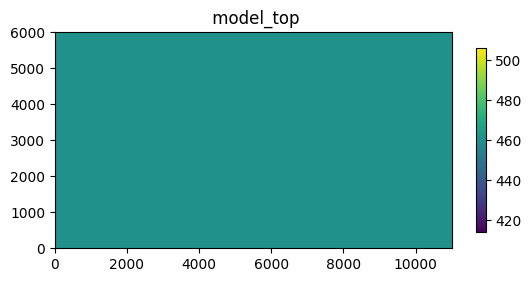

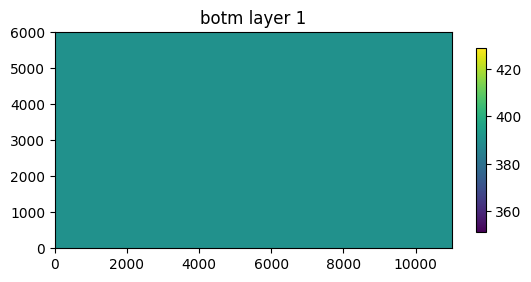

In [7]:
nrow = 6
ncol = 11

delr = 6000/nrow
delc = 11000/ncol

dis = mf.ModflowDis(model, nlay=1, nrow=nrow, ncol=ncol, delr=delr, delc=delc, top=460, botm=390, nper=1, steady=True)
dis.plot()

[<Axes: title={'center': 'ibound layer 1'}>,
 <Axes: title={'center': 'strt layer 1'}>]

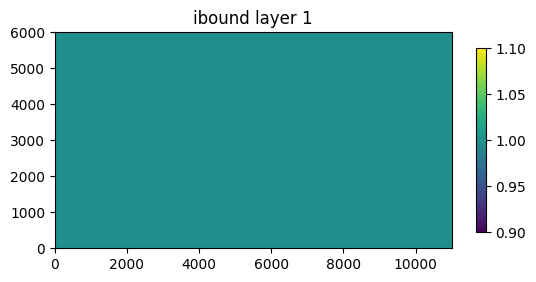

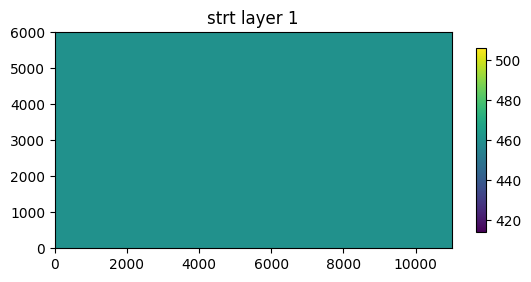

In [8]:
bas = mf.ModflowBas(model, ibound=1, strt=460)
bas.plot()

### Setup Boundary Conditions East/West

[<Axes: title={'center': ' CHD location stress period 1 layer 1'}>]

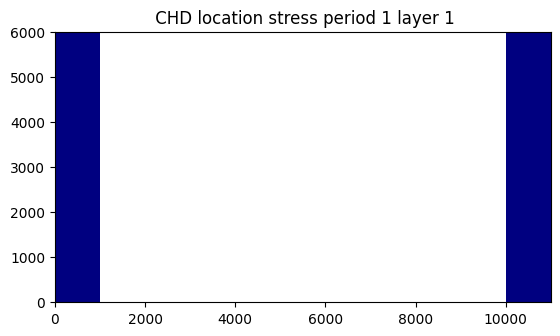

In [9]:
spd = {
    0: [
        [0, 0, 0, 450, 450],
        [0, 1, 0, 450, 450],
        [0, 2, 0, 450, 450],
        [0, 3, 0, 450, 450],
        [0, 4, 0, 450, 450],
        [0, 5, 0, 450, 450],
        [0, 0, 10, 445, 445],
        [0, 1, 10, 445, 445],
        [0, 2, 10, 445, 445],
        [0, 3, 10, 445, 445],
        [0, 4, 10, 445, 445],
        [0, 5, 10, 445, 445],
    ]
}

chd = mf.ModflowChd(model, stress_period_data=spd)
chd.plot()

### Setup Recharge


[<Axes: title={'center': 'RECH stress period 1'}>]

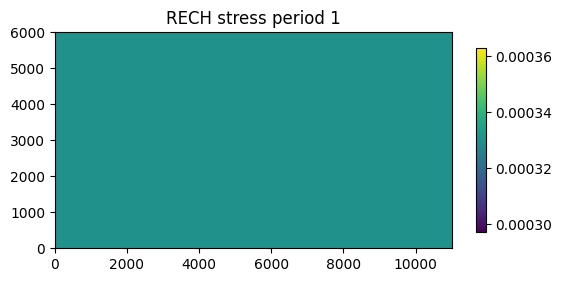

In [10]:
rech = {}
rech[0] = 0.00033
rch = mf.ModflowRch(model, rech=rech)
rch.plot()

### Setup River

[<Axes: title={'center': ' RIV location stress period 1 layer 1'}>]

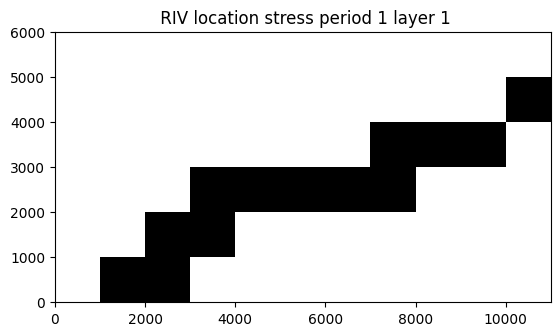

In [11]:
spd = {
    0: [
        [0, 5, 1, 450, 86.4, 448],
        [0, 5, 2, 450, 86.4, 448],
        [0, 4, 2, 450, 86.4, 448],
        [0, 4, 3, 450, 86.4, 448],
        [0, 3, 3, 450, 86.4, 448],
        [0, 3, 4, 450, 86.4, 448],
        [0, 3, 5, 450, 86.4, 448],
        [0, 3, 6, 450, 86.4, 448],
        [0, 3, 7, 450, 86.4, 448],
        [0, 2, 7, 450, 86.4, 448],
        [0, 2, 8, 450, 86.4, 448],
        [0, 2, 9, 450, 86.4, 448],
        [0, 1, 10, 450, 86.4, 448],        
    ]
}
riv = mf.ModflowRiv(model, stress_period_data=spd)
riv.plot()

### Setup lake

In [19]:
lakArr = np.zeros((1,6,11))
lakArr[0, 1, 1] = 1
lakArr = np.array(lakArr)

In [20]:
bdlknc=np.zeros((1,6,11))
bdlknc[0, 1, 1] = 100

In [21]:
flux_data={0:[[0.0073, 0.0073, 0.0, 0.0]]}

In [22]:

lakArr = np.zeros((1,6,11))

lak = mf.ModflowLak(
    model,
    nlakes=1,
    theta=-1,
    nssitr=10,
    sscncr=0.001,
    surfdep=2,
    stages=[448],
    lakArr=lakArr,
    bdlknc=bdlknc,
    flux_data=flux_data,
    unit_number=16,
)

Exception: Transient3d error: value type not recognized: <class 'NoneType'>

### Setup Wells

In [ ]:
spd = {
    0: [
        [0, 1, 1, -5000],
        [0, 1, 2, -5000],
        [0, 1, 6, -10000],
        [0, 1, 9, -5000],
        [0, 3, 1, -5000],
        [0, 4, 4, -5000],
    ]
}
wel = mf.ModflowWel(model, stress_period_data=spd)
wel.plot()

### Setup Flow-Package (incl. soil parameters)

In [ ]:
lpf = mf.ModflowLpf(model, hk=8.64, vka=0.864, ss=1e-5, sy=0.2)
lpf.plot()

### The Solver and Output Control

In [ ]:
pcg = mf.ModflowPcg(model, rclose=1e-2, hclose=1e-2)
oc = mf.ModflowOc(model)

### Calculate the model

In [ ]:
model.write_input()
model.run_model()

### Read calculated data

In [ ]:
import flopy.utils as fu

hds = fu.HeadFile(os.path.join(workspace, 'RP1.hds'))
h = hds.get_data(kstpkper=(0,0))

### Plot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, delr * ncol, ncol)
y = np.linspace(delc* nrow, 0, nrow)

c = plt.contour(x, y, h[0], np.arange(430, 450, .5))
plt.clabel(c, fmt='%2.1f')
plt.axis('scaled')
plt.plot()